In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!kaggle datasets download -d shree1992/housedata/

Dataset URL: https://www.kaggle.com/datasets/shree1992/housedata/versions/
License(s): unknown
  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 104MB/s]


In [6]:
!unzip /content/housedata.zip

Archive:  /content/housedata.zip
  inflating: data.csv                
  inflating: data.dat                
  inflating: output.csv              


In [8]:
# Load the datasets
df_output = pd.read_csv('/content/output.csv')
df_data = pd.read_csv('/content/data.csv')

### Data Exploration


In [9]:
# Display the first few rows of each dataset
df_output.head(), df_data.head()

(                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
 0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
 1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
 2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
 3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
 4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   
 
    floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
 0     1.5           0     0          3        1340              0      1955   
 1     2.0           0     4          5        3370            280      1921   
 2     1.0           0     0          4        1930              0      1966   
 3     1.0           0     0          4        1000           1000      1963   
 4     1.0           0     0          4        1140            800      1976   
 
    yr_renovated        

### Data Cleaning and Preprocessing

In [10]:
# Check for missing values
df_output.isnull().sum(), df_data.isnull().sum()

(date             0
 price            0
 bedrooms         0
 bathrooms        0
 sqft_living      0
 sqft_lot         0
 floors           0
 waterfront       0
 view             0
 condition        0
 sqft_above       0
 sqft_basement    0
 yr_built         0
 yr_renovated     0
 street           0
 city             0
 statezip         0
 country          0
 dtype: int64,
 date             0
 price            0
 bedrooms         0
 bathrooms        0
 sqft_living      0
 sqft_lot         0
 floors           0
 waterfront       0
 view             0
 condition        0
 sqft_above       0
 sqft_basement    0
 yr_built         0
 yr_renovated     0
 street           0
 city             0
 statezip         0
 country          0
 dtype: int64)

In [11]:
# Convert 'date' columns to datetime
df_output['date'] = pd.to_datetime(df_output['date'])
df_data['date'] = pd.to_datetime(df_data['date'])

### Exploratory Data Analysis (EDA)

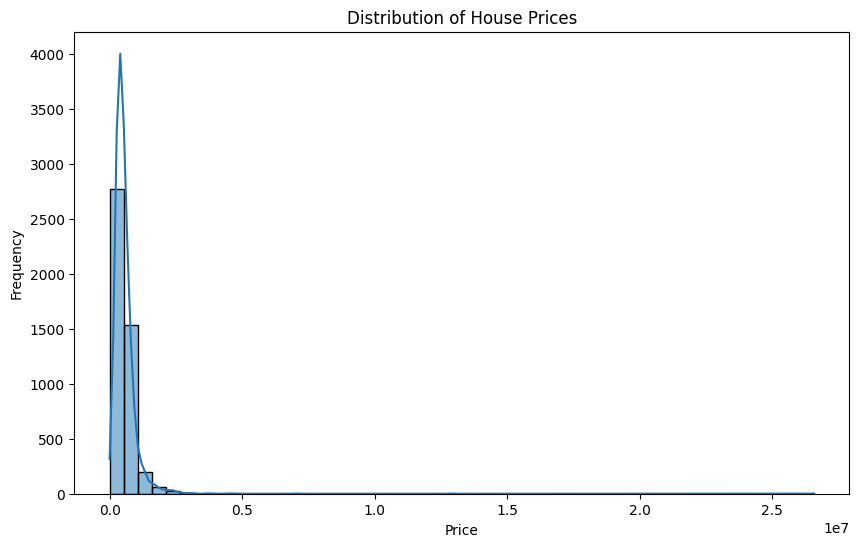

In [12]:
# Distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(df_output['price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

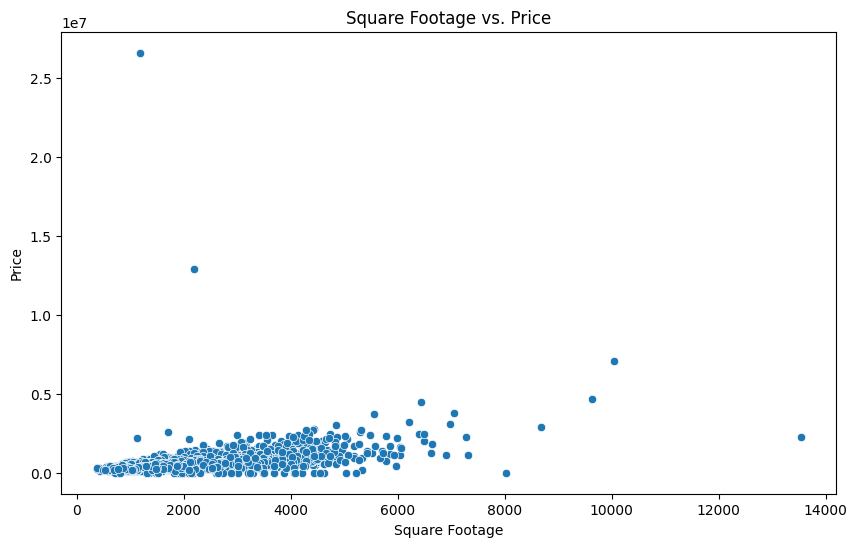

In [13]:
# Relationship between square footage and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df_output)
plt.title('Square Footage vs. Price')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

### Correlation Heatmap.

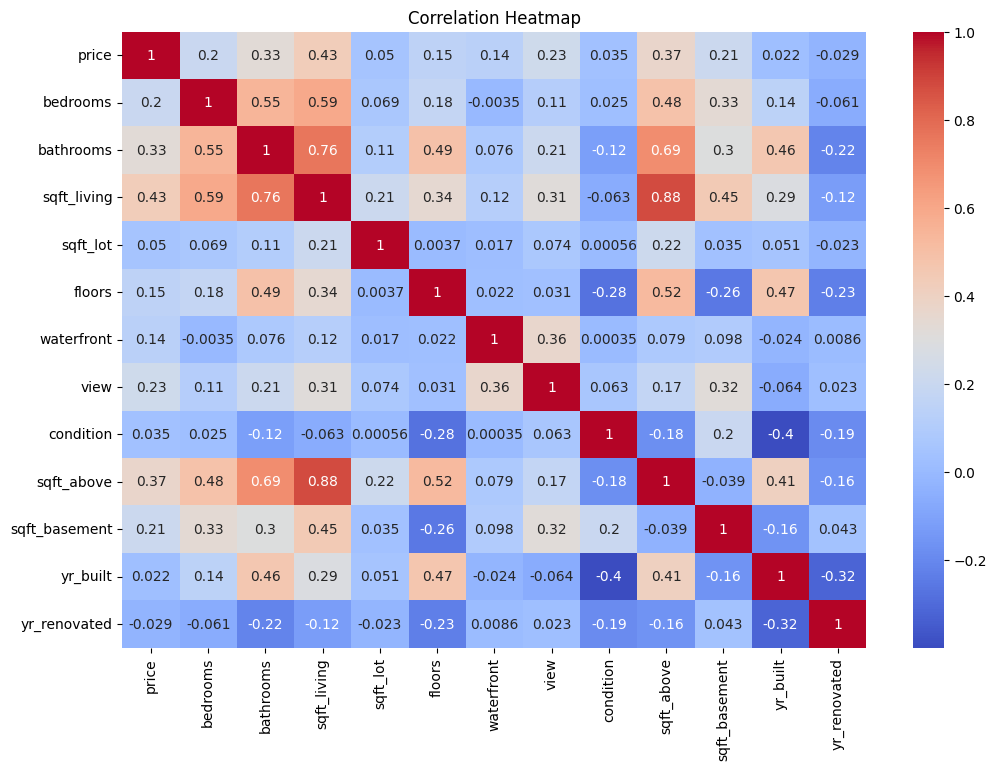

In [14]:
# Correlation heatmap
numeric_df = df_output.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Building a House Price Predictor

In [15]:
# Prepare the data for modeling
X = numeric_df.drop('price', axis=1)
y = numeric_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(986918350899.6674, 0.0322872063103935)